   [-0.90954774 -0.94974874  0.86934673  0.1959799  -0.76884422  0.03517588
 -0.67839196  0.84924623 -0.91959799 -0.69849246 -0.54773869  0.46733668
 -0.79899497  0.50753769  0.95979899  0.5678392  -0.98994975  0.79899497
 -0.37688442 -0.33668342 -0.42713568 -0.15577889  0.91959799 -0.64824121
  0.05527638 -0.5678392   0.41708543  0.67839196 -0.96984925  0.53768844
  0.9798995   0.61809045  0.27638191  0.10552764  0.2160804   0.68844221
  0.85929648 -0.50753769 -0.22613065 -0.14572864  0.33668342 -0.10552764
  0.2361809  -0.92964824  0.35678392 -0.2361809   0.6281407  -0.95979899
  0.43718593  0.15577889 -0.6080402  -0.89949749 -0.48743719 -0.13567839
  0.81909548 -0.86934673 -0.30653266 -0.61809045  0.75879397 -0.00502513
  0.47738693 -0.53768844 -0.2160804   0.12562814 -0.47738693 -0.6281407
  0.39698492 -0.06532663 -0.71859296 -0.45728643  0.89949749  0.06532663
  1.          0.6080402   0.88944724 -0.78894472  0.31658291  0.92964824
  0.69849246  0.42713568  0.18592965 -0.83919598 

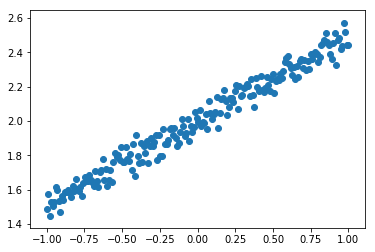

In [4]:
import numpy as np #随机数
np.random.seed(1271)
from keras.models import Sequential #深度学习的模型
from keras.layers import Dense #层的输入输出
import matplotlib.pyplot as plt #绘图
%matplotlib inline

x = np.linspace(-1,1,200) #-1,1之间切割200份
np.random.shuffle(x) #打乱顺序
print("  ",x)
y = 0.5*x+2+np.random.normal(0,0.05,(200,)) #y与x插入一个随机数矩阵
print("  ",y)
plt.scatter(x,y)
plt.show()

e:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  after removing the cwd from sys.path.


  训练-------------------------
  训练结束 4.128875
  训练结束 0.08818163
  训练结束 0.007234028
  训练结束 0.0033218716
  测试-------------------------
40/40 [==============================] - 0s 649us/step
  测试结果 0.0031625672709196806
w= [[0.43880212]] b= [1.9984751]


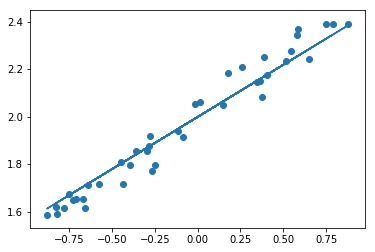

In [7]:
x_train,y_train = x[:160],y[:160] #切割测试，训练
x_test,y_test = x[160:],y[160:]
model = Sequential() #建立模型
model.add(Dense(input_dim=1,output_dim=1)) #输入为1，输出为1
model.compile(loss='mse',optimizer='sgd') #设置损失函数，设定优化
print("  训练-------------------------")
for step in range(301):
    cost = model.train_on_batch(x_train,y_train)
    if step%100==0:
        print("  训练结束",cost)
print("  测试-------------------------")
cost = model.evaluate(x_test,y_test,batch_size=40)
print("  测试结果",cost)
w,b = model.layers[0].get_weights() #抓取斜率和截距
print("w=",w,"b=",b)
y_new=model.predict(x_test) #测试
plt.scatter(x_test,y_test) #测试数据散点图
plt.plot(x_test,y_new) #预测的直线图
plt.show()